In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('data/stud.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

DATA CHECKS TO PERFORM 

check missing values

In [6]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

check duplicates

In [7]:
df.duplicated().sum()

0

check data type

In [8]:
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


check the no of unique values for each column

In [10]:
for i in range(df.columns.size):
    print(df[df.columns[i]].unique().sum())

femalemale
group Bgroup Cgroup Agroup Dgroup E
bachelor's degreesome collegemaster's degreeassociate's degreehigh schoolsome high school
standardfree/reduced
nonecompleted
4808
4530
4728


In [11]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

check statistics of dataset

In [12]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


EXPLORING DATA

In [13]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [14]:
print("no of categories in the gender :",end=" ")
print(df['gender'].unique())

print("no of categories in race_ethnicity:",end="")
print(df['race_ethnicity'].unique())

print("no of categories in parental_level_of_education",end="")
print(df['parental_level_of_education'].unique())

print("categories in 'lunch' variable:",end="")
print(df['lunch'].unique())

print("categories in 'test prepration course' variable :",end="")
print(df['test_preparation_course'].unique())

no of categories in the gender : ['female' 'male']
no of categories in race_ethnicity:['group B' 'group C' 'group A' 'group D' 'group E']
no of categories in parental_level_of_education["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'lunch' variable:['standard' 'free/reduced']
categories in 'test prepration course' variable :['none' 'completed']


In [15]:
#define categorical and numerical variables
categorical_variables = [feature for feature in df.columns if df[feature].dtype == 'O']
numerical_variables = [feature for feature in df.columns if df[feature].dtype != 'O']

print('we have {} numerical features :{}'.format(len(numerical_variables),numerical_variables))
print('we have {} categorical features:{}'.format(len(categorical_variables),categorical_variables))

we have 3 numerical features :['math_score', 'reading_score', 'writing_score']
we have 5 categorical features:['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [16]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


Adding column for total score and average

In [17]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [18]:
reading_full  = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f"no of student having full marks in math are:{math_full}")
print(f"no of students having full marks in reading : {reading_full}")
print(f"no of students havingfull socre in writing :{writing_full}")

no of student having full marks in math are:7
no of students having full marks in reading : 17
no of students havingfull socre in writing :14


In [19]:
reading_less_20  = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f"no of student having less than 20 marks in math are:{math_less_20}")
print(f"no of student having less than 20 marks in reading : {reading_less_20}")
print(f"no of student having less than 20 marks in writing :{writing_less_20}")

no of student having less than 20 marks in math are:4
no of student having less than 20 marks in reading : 1
no of student having less than 20 marks in writing :3


Exploring data (visualization)

histogram and kde

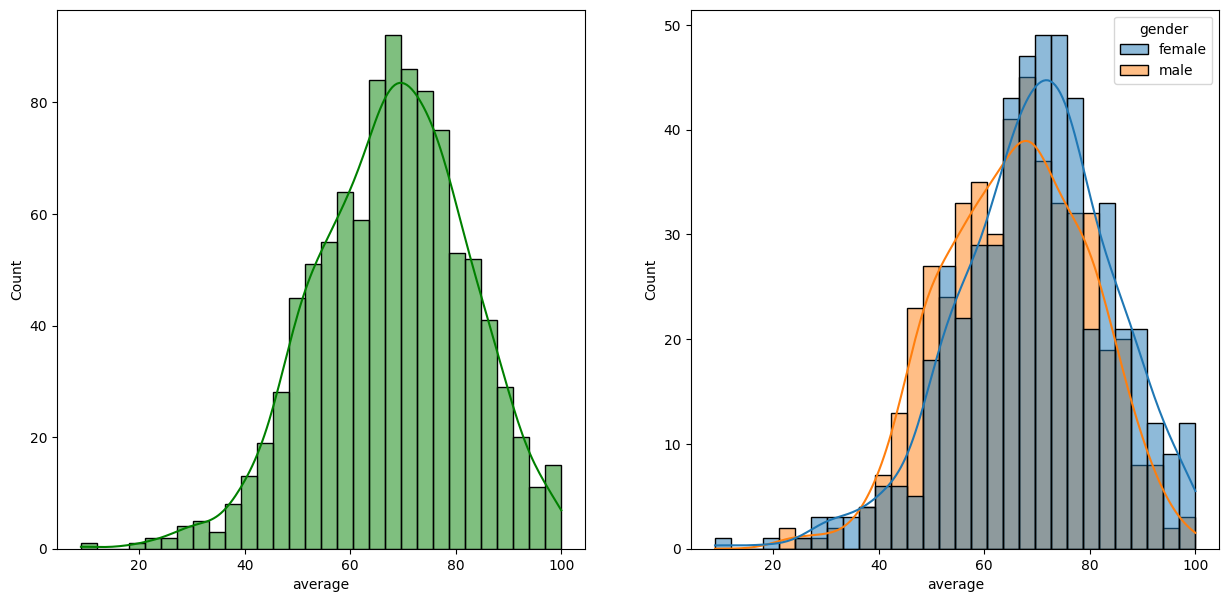

In [20]:
plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',bins=30,kde=True,hue='gender')
plt.show()

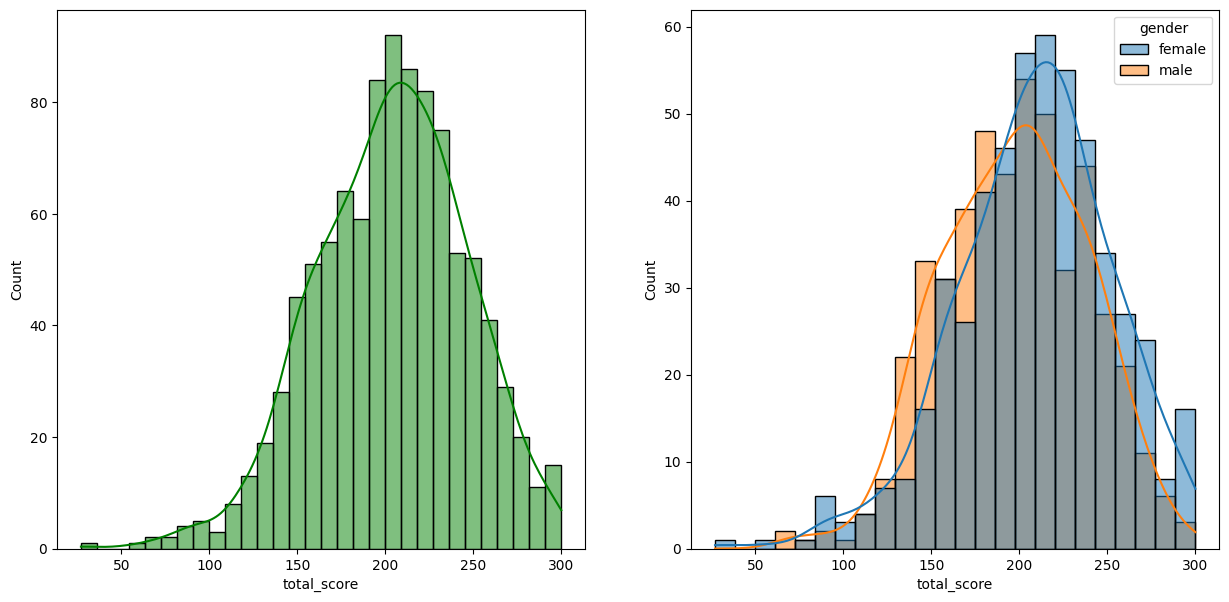

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

insights
female students tend to preform well then male students

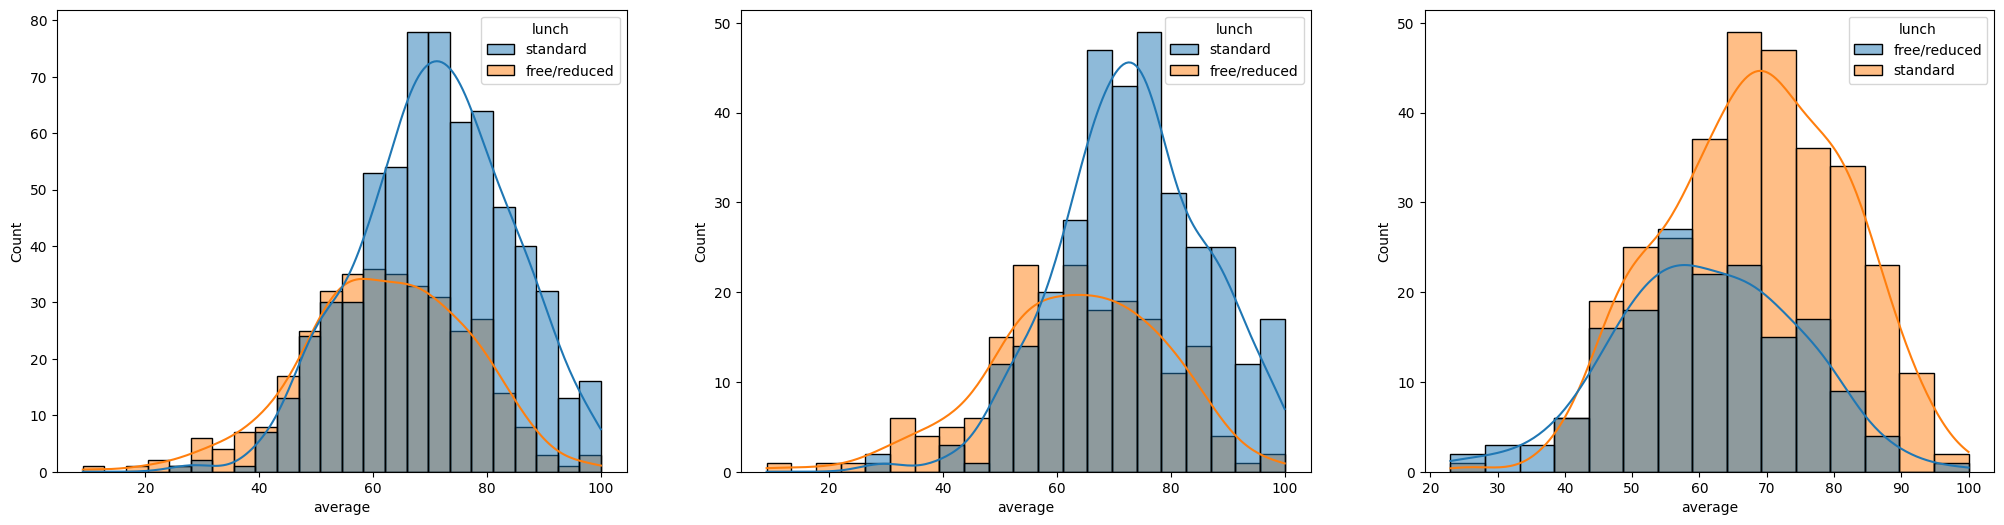

In [23]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df['gender'] == 'female'],x='average',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df['gender'] == 'male'],x='average',kde=True,hue='lunch')
plt.show()

In [ ]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='parental level of edcation')
plt.subplot(132)
sns.histplot(data=df[df['gender'] == 'female'],x='average',kde=True,hue='parental level of edcation')
plt.subplot(133)
sns.histplot(data=df[df['gender'] == 'male'],x='average',kde=True,hue='parental level of edcation')
plt.show()

Maximum socre of the student in all 3 subjects 

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(1,4,1)
plt.title('Math Scores')
sns.violinplot(y='math socre',data=df,color='red',linewidth=3)
plt.subplot(1,4,2)
plt.title('Reading scores')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1,4,3)
plt.title('Writing scores')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()